In [104]:
# %pip install opendatasets
import opendatasets as od
import pandas as pd
import numpy as np
 
od.download('https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption')

Skipping, found downloaded files in ".\hourly-energy-consumption" (use force=True to force download)


In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [106]:
df = pd.read_csv('hourly-energy-consumption/PJME_hourly.csv').set_index('Datetime')
df.index = pd.to_datetime(df.index)

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
...,...
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0


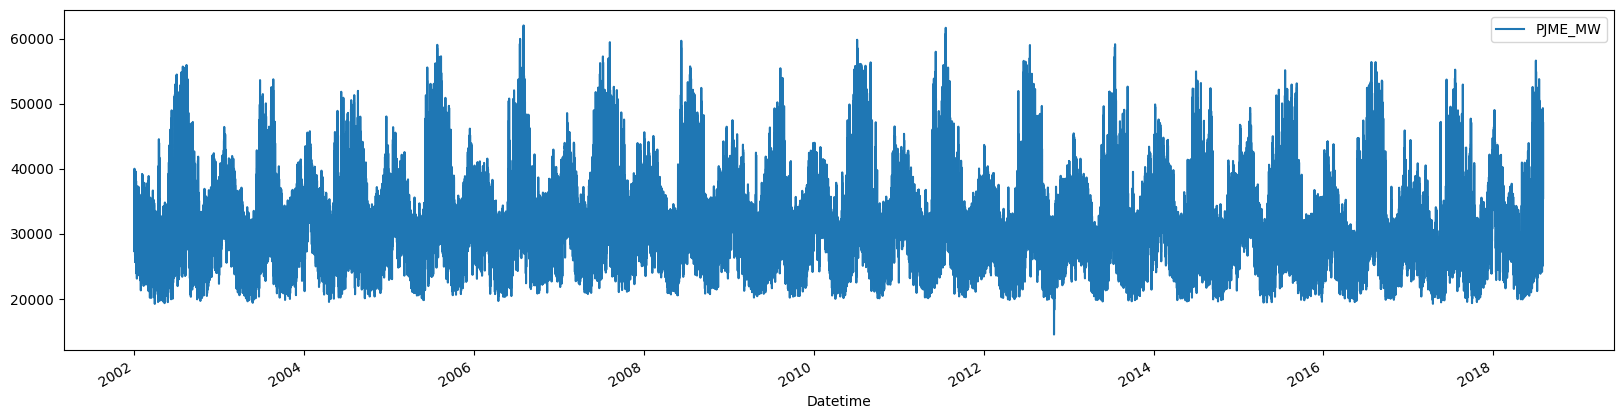

In [107]:
df.plot(figsize=(20, 5))
df

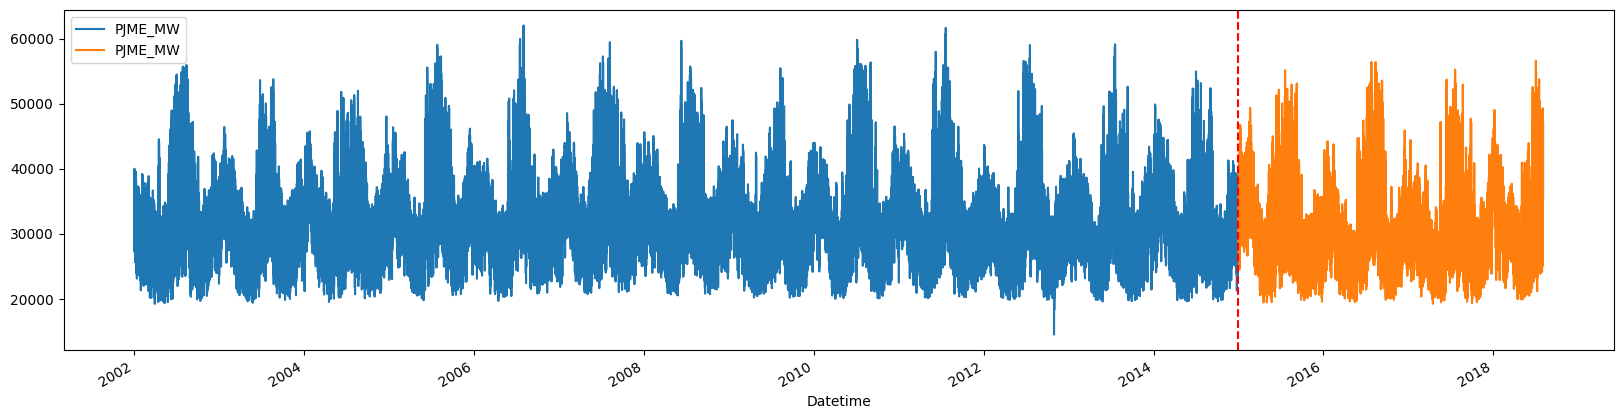

In [108]:
train  = df[df.index.year < 2015]
test = df[df.index.year >= 2015]

fig, ax = plt.subplots(figsize=(20, 5))
train.plot(ax=ax,  label='train')
test.plot(ax=ax, label='test')
ax.axvline(test.index[0], color='r', linestyle='--')

<AxesSubplot: title={'center': '1 week of data'}, xlabel='Datetime'>

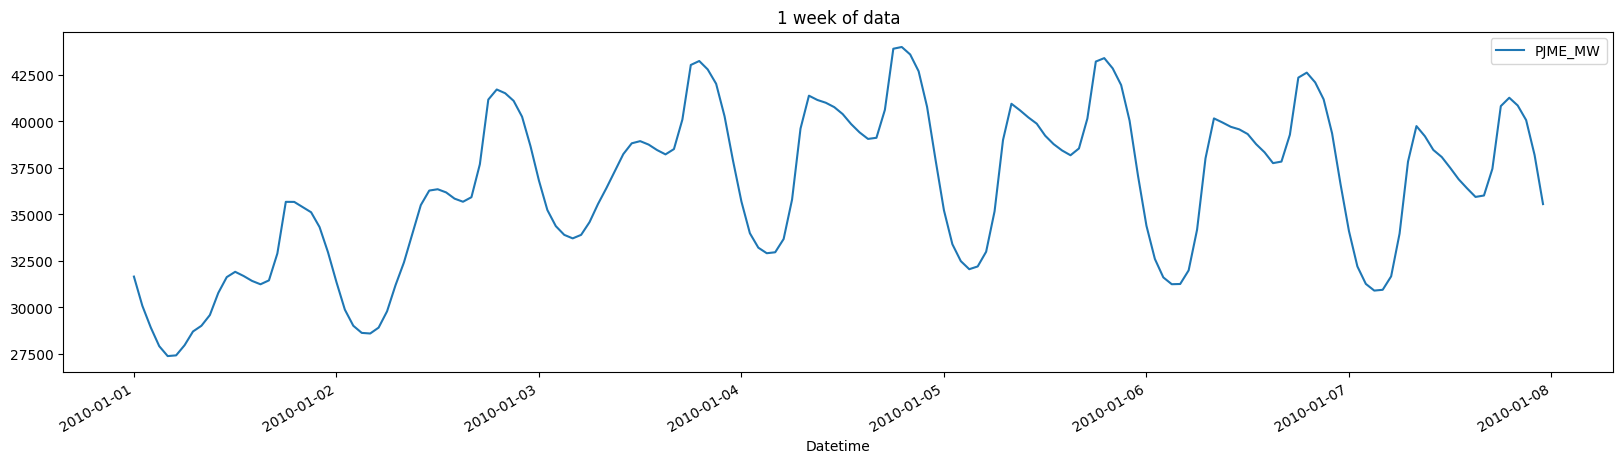

In [109]:
# getting 1 week of data
df.loc['2010-01-01':'2010-01-07'].plot(figsize=(20, 5), title='1 week of data')

In [110]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['dayofyear'] = df.index.dayofyear
    df['year'] = df.index.year
    return(df)
    
df = create_features(df)

In [111]:
df

,PJME_MW,hour,dayofweek,quarter,month,dayofyear,year
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,365,2002
2002-12-31 02:00:00,25147.0,2,1,4,12,365,2002
2002-12-31 03:00:00,24574.0,3,1,4,12,365,2002
2002-12-31 04:00:00,24393.0,4,1,4,12,365,2002
2002-12-31 05:00:00,24860.0,5,1,4,12,365,2002
...,...,...,...,...,...,...,...
2018-01-01 20:00:00,44284.0,20,0,1,1,1,2018
2018-01-01 21:00:00,43751.0,21,0,1,1,1,2018
2018-01-01 22:00:00,42402.0,22,0,1,1,1,2018


Text(0.5, 1.0, 'Box plot of hourly energy consumption')

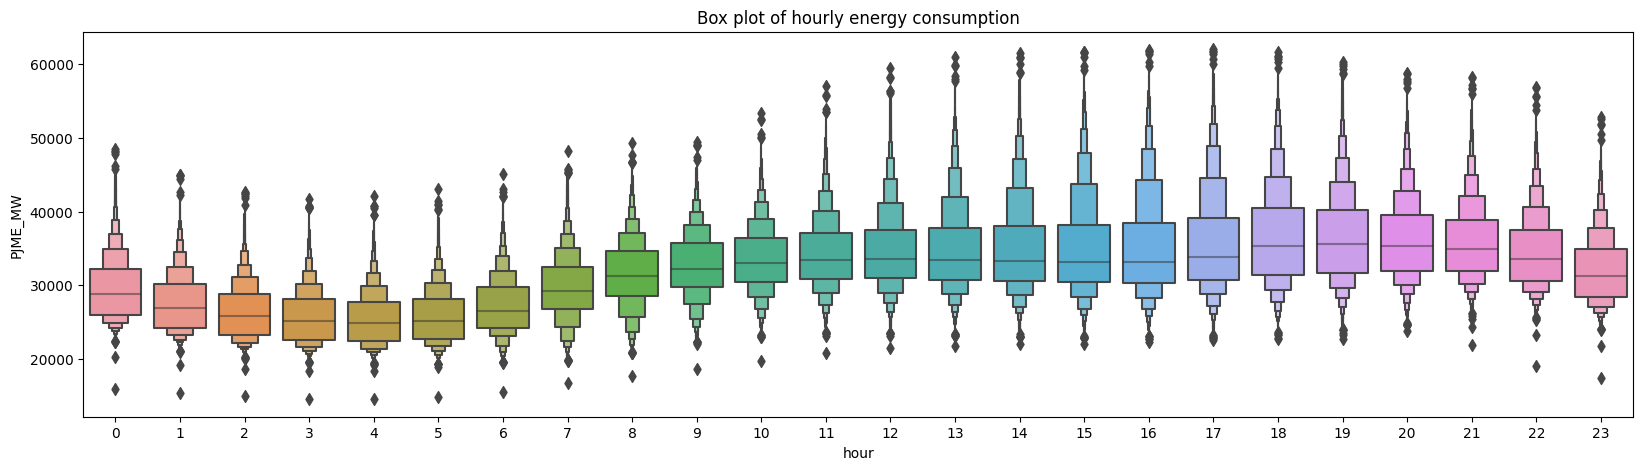

In [112]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.boxenplot(x='hour', y='PJME_MW', data=df, ax=ax)
ax.set_title('Box plot of hourly energy consumption')

Text(0.5, 1.0, 'Box plot of monthly energy consumption')

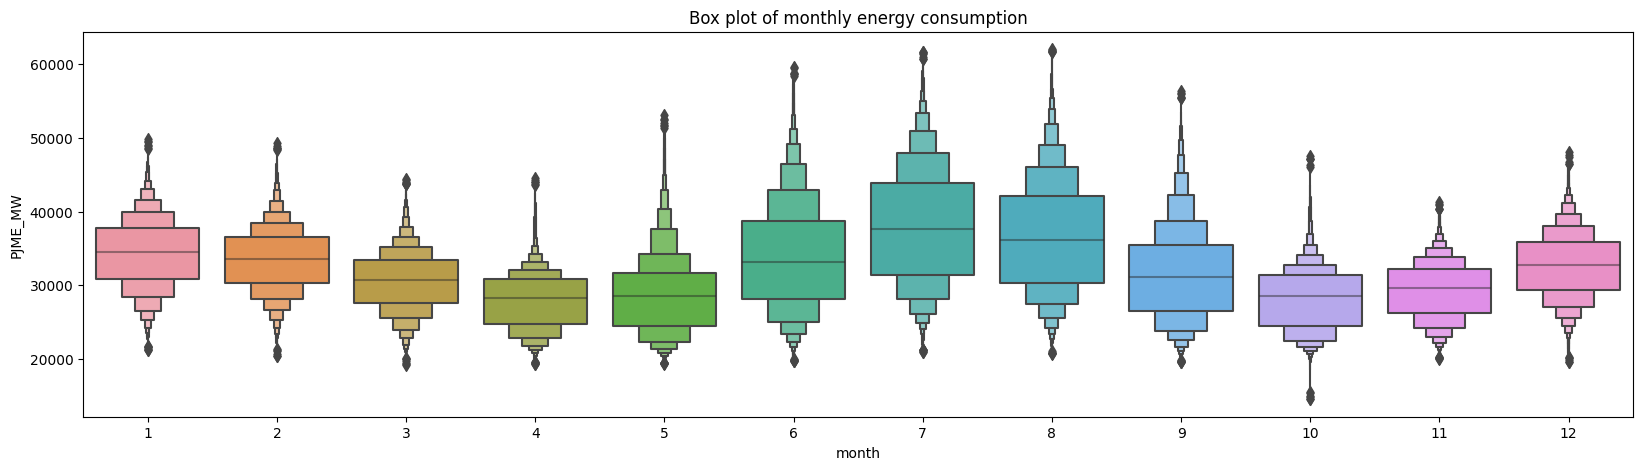

In [113]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.boxenplot(x='month', y='PJME_MW', data=df, ax=ax)
ax.set_title('Box plot of monthly energy consumption')

In [114]:
test = create_features(test)
train = create_features(train)

C:\Users\darklane\AppData\Local\Temp\ipykernel_3960\2427254765.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
C:\Users\darklane\AppData\Local\Temp\ipykernel_3960\2427254765.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek'] = df.index.dayofweek
C:\Users\darklane\AppData\Local\Temp\ipykernel_3960\2427254765.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [115]:
reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=40, learning_rate=0.01)
reg.fit(train.drop('PJME_MW', axis=1), train['PJME_MW']
        , eval_set=[(test.drop('PJME_MW', axis=1), test['PJME_MW'])]
        , verbose=20)


[0]	validation_0-rmse:31654.28935
[20]	validation_0-rmse:25791.24419
[40]	validation_0-rmse:21029.63022
[60]	validation_0-rmse:17172.21388
[80]	validation_0-rmse:14038.34944
[100]	validation_0-rmse:11516.21767
[120]	validation_0-rmse:9539.05346
[140]	validation_0-rmse:7974.50892
[160]	validation_0-rmse:6764.06658
[180]	validation_0-rmse:5847.77173
[200]	validation_0-rmse:5165.05119
[220]	validation_0-rmse:4676.04440
[240]	validation_0-rmse:4319.75632
[260]	validation_0-rmse:4079.79661
[280]	validation_0-rmse:3928.59770
[300]	validation_0-rmse:3831.47248
[320]	validation_0-rmse:3774.77204
[340]	validation_0-rmse:3741.41587
[360]	validation_0-rmse:3721.66568
[380]	validation_0-rmse:3716.18779
[400]	validation_0-rmse:3714.21341
[420]	validation_0-rmse:3717.62838
[440]	validation_0-rmse:3723.91807
[442]	validation_0-rmse:3724.83626


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=40, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

<AxesSubplot: title={'center': 'Feature importance'}, ylabel='feature'>

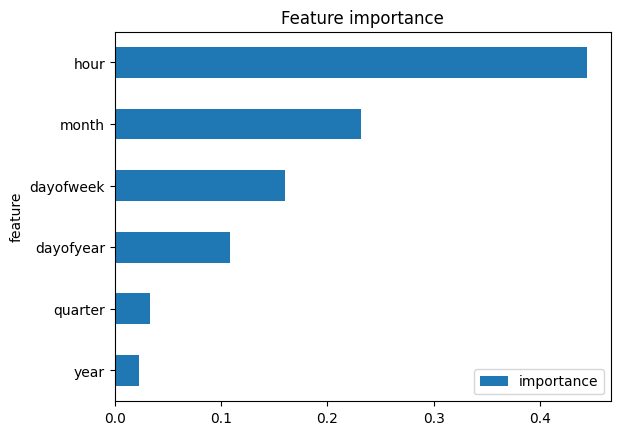

In [117]:
p = pd.DataFrame({'feature': train.drop('PJME_MW', axis=1).columns, 'importance': reg.feature_importances_}).sort_values('importance', ascending=True)
p.plot.barh(x='feature', y='importance', title='Feature importance')

In [118]:
reg.predict(test.drop('PJME_MW', axis=1))

array([31939.557, 28292.229, 27183.92 , ..., 34855.83 , 33332.582,
       31923.324], dtype=float32)